### Numpy satellite image analysis

In [3]:
%matplotlib inline
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt

### Creating numpy array from an image file

In [7]:
#Crate an numpy array with WIFIRE satellite image file and display its type
from skimage import data
image_data = misc.imread('sd-3layers.jpg')
print(type(image_data))

C:\Users\siva.mulagala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'numpy.ndarray'>


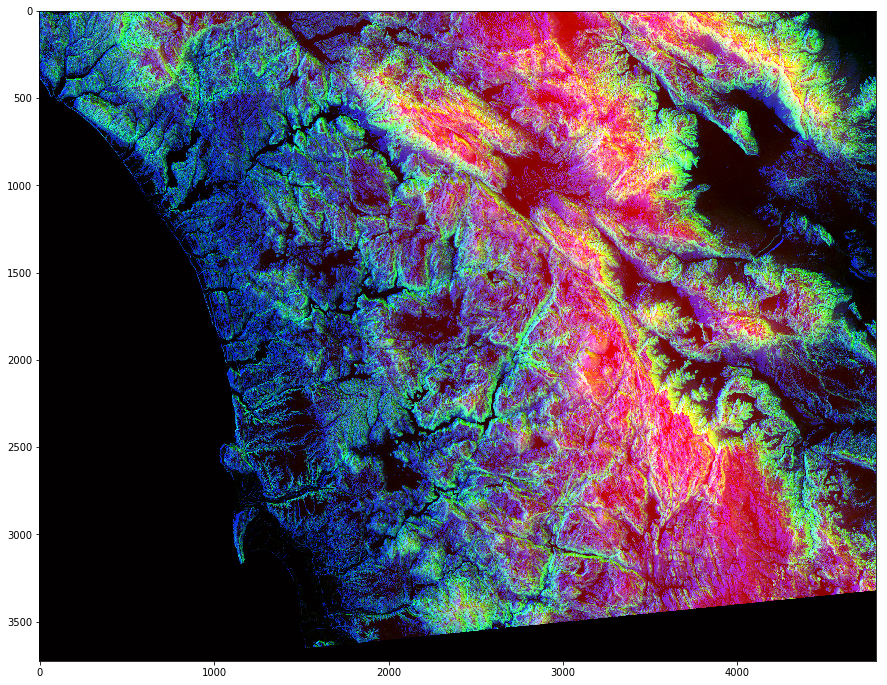

In [13]:
#Lets try to plot the image
plt.figure(figsize=(15, 15))
plt.imshow(image_data)

In [14]:
print(image_data.shape)

(3725, 4797, 3)


#### Here the shape of the ndarray shows the 3 layered matrix, First two are length and width and the third one(i.e, 3) shows the three layers i.e, Red, Green and Blue
### RGB color mapping in the photo:

* RED pixel indicates Altitude
* BLUE pixel indicates Aspect
* GREEN pixel indicates Slope

Note: Here the higher values indicates higher altitude, aspect and slope

In [15]:
#To display the size
print(image_data.size)

53606475


In [17]:
#To display min and max values
print(image_data.min(), image_data.max())

0 255


In [19]:
#To get the average pixel value
print(image_data.mean())

75.8299354508947


In [30]:
#Pixel on the 150th row and 250th column
print(image_data[0,1])
# print(image_data)
print(image_data[0])

[ 0 11 57]
[[  0  22  35]
 [  0  11  57]
 [ 19  32 128]
 ...
 [ 19  21  98]
 [  0   6  28]
 [  0  19   0]]


### Changing colours in range:

* We can also use the range to change the pixel values for ex, We can set the green color to full intensity in the rows range 200 to 8000

C:\Users\siva.mulagala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


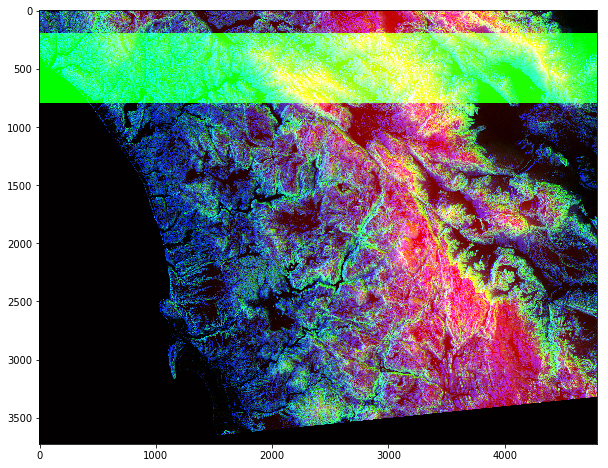

In [32]:
image_data = misc.imread('sd-3layers.jpg')
image_data[200:800, :, 1] = 255
plt.figure(figsize=(10,10))
plt.imshow(image_data)

* We can change all the colours to one color by omiting the thrid value, which is depth RGB

C:\Users\siva.mulagala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


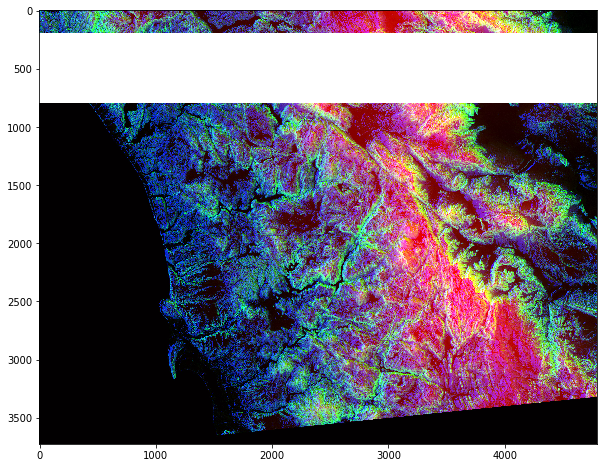

In [33]:
image_data = misc.imread('sd-3layers.jpg')
image_data[200:800, :] = 255
plt.figure(figsize=(10,10))
plt.imshow(image_data)

* In the above picture we can see that all the pixels ranged from 200 to 800 changed to white colour as we applied to all the colous

### Now pick all the filters with the low values


In [39]:
image_data = misc.imread('sd-3layers.jpg')
print("Shape of the image data", image_data.shape)
#This will create the same nd array with the boolean values retaining the same shape
low_pixel_data = image_data < 170 #Increase this value to see the changes in image
print("Shape of the image data after selecting low pixels", low_pixel_data.shape)

C:\Users\siva.mulagala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Shape of the image data (3725, 4797, 3)
Shape of the image data after selecting low pixels (3725, 4797, 3)


### Filtering out low values and replacing them with 0

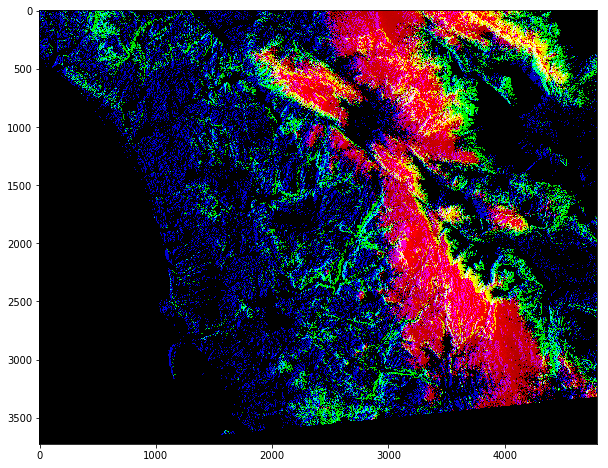

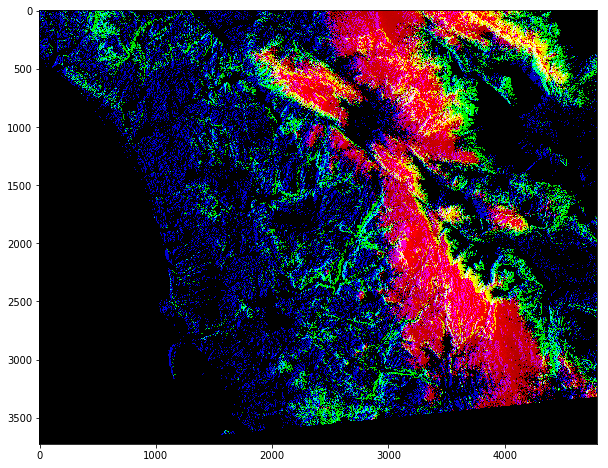

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(image_data)
#Now set the low values to 0
image_data[low_pixel_data]= 0
plt.figure(figsize=(10,10))
plt.imshow(image_data)

In [45]:
print(len(image_data))
print(np.arange(len(image_data)))

3725
[   0    1    2 ... 3722 3723 3724]


### More row and column operations

* We can create more complex patterns by making columns a function of rows or vice versa


<class 'numpy.ndarray'>
[[[255 255 255]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [255 255 255]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0 174]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


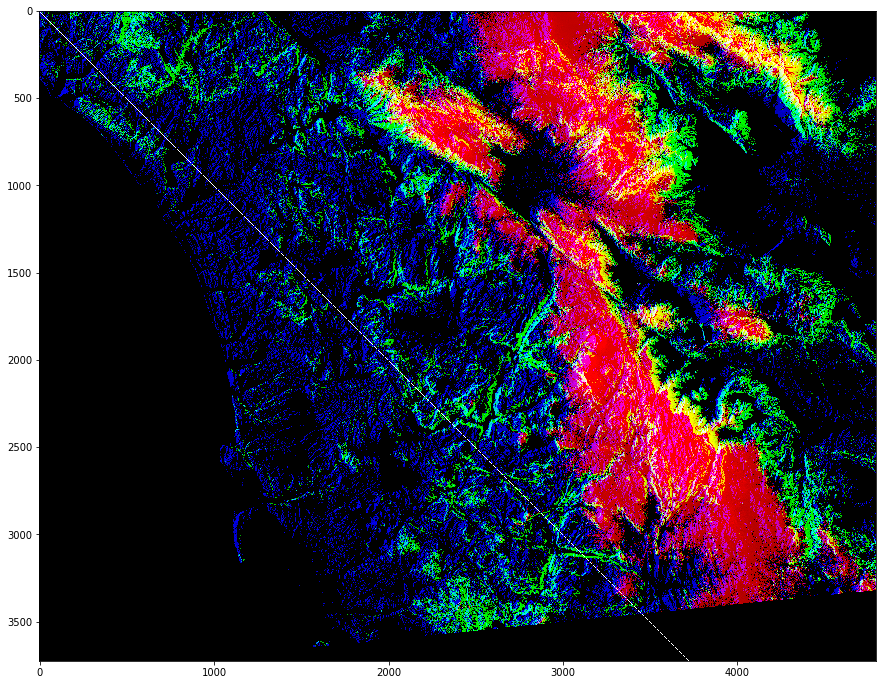

In [55]:
rows_range = np.arange(len(image_data))
cols_range = rows_range
print(type(rows_range))
image_data[rows_range, cols_range]=255
plt.figure(figsize=(15,15))
plt.imshow(image_data)
print(image_data)
# np.savetxt('data.txt', image_data)